In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import librosa
import matplotlib.pyplot as plt

import os
from PIL import Image
from pathlib import Path
import csv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import tensorflow
import librosa.display

In [8]:
import librosa
audio_file_path="C:\\Users\\ril\\Downloads\\ch_005.wav"
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [15]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
#mfccs=mfccs.T
print(mfccs.shape)

(40, 127)


In [44]:
import numpy as np
dataset = []
cla=[]
genres = {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 
        'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}

for genre, genre_number in genres.items():
    for filename in os.listdir(f'D:\\shravanne-tasks\\new\\genres_original\\{genre}'):
        songname = f'D:\\shravanne-tasks\\new\\genres_original\\{genre}\\{filename}'
        for index in range(14):
            audio, sr = librosa.load(songname,res_type='kaiser_test')
            mfcc_fea = np.mean(librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40).T,axis=0)
            
            fea_class=genre
            dataset.append(mfcc_fea)
            cla.append(fea_class)

In [45]:
d = {'Features':dataset,'class':cla}

In [46]:
import pandas as pd
extracted_features_df=pd.DataFrame(d)
extracted_features_df.head()

,Features,class
0,"[-113.59882, 121.57067, -19.162262, 42.36394, ...",blues
1,"[-113.59882, 121.57067, -19.162262, 42.36394, ...",blues
2,"[-113.59882, 121.57067, -19.162262, 42.36394, ...",blues
3,"[-113.59882, 121.57067, -19.162262, 42.36394, ...",blues
4,"[-113.59882, 121.57067, -19.162262, 42.36394, ...",blues


In [47]:
X=np.array(extracted_features_df['Features'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [48]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [50]:
X_train.shape

(11200, 40)

In [51]:
X_test.shape

(2800, 40)

In [52]:
X_train=np.reshape(X_train,(X_train.shape[0],10,4))
X_test=np.reshape(X_test,(X_test.shape[0],10,4))

In [53]:
X_train.shape

(11200, 10, 4)

In [55]:
import keras

In [57]:
input_shape=(10,4)

In [58]:
model = keras.Sequential()

    # 2 LSTM layers
model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True))
model.add(keras.layers.LSTM(64))

    # dense layer
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.3))

    # output layer
model.add(keras.layers.Dense(10, activation='softmax'))
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
                  loss='categorical_crossentropy',
                  metrics=['acc'])

In [60]:
progression = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=40)

Epoch 1/40
350/350 [==============================] - 24s 14ms/step - loss: 1.1566 - acc: 0.6180 - val_loss: 1.0188 - val_acc: 0.6739
Epoch 2/40
350/350 [==============================] - 3s 10ms/step - loss: 1.0538 - acc: 0.6513 - val_loss: 0.9296 - val_acc: 0.6993
Epoch 3/40
350/350 [==============================] - 4s 11ms/step - loss: 0.9525 - acc: 0.6829 - val_loss: 0.8799 - val_acc: 0.7086
Epoch 4/40
350/350 [==============================] - 4s 11ms/step - loss: 0.8925 - acc: 0.7035 - val_loss: 0.7992 - val_acc: 0.7236
Epoch 5/40
350/350 [==============================] - 4s 11ms/step - loss: 0.8170 - acc: 0.7274 - val_loss: 0.7201 - val_acc: 0.7682
Epoch 6/40
350/350 [==============================] - 3s 9ms/step - loss: 0.7490 - acc: 0.7582 - val_loss: 0.6619 - val_acc: 0.7939
Epoch 7/40
350/350 [==============================] - 3s 10ms/step - loss: 0.7057 - acc: 0.7706 - val_loss: 0.6056 - val_acc: 0.8161
Epoch 8/40
350/350 [==============================] - 3s 9ms/step - l

In [61]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.9989285469055176


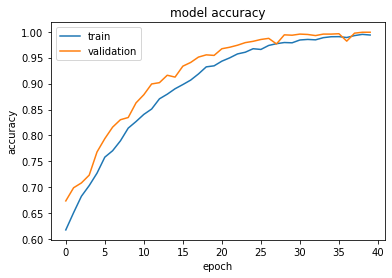

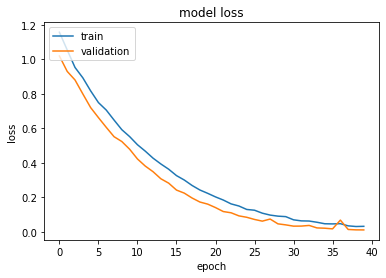

In [70]:
import matplotlib.pyplot as plt
plt.plot(progression.history['acc'])
plt.plot(progression.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(progression.history['loss'])
plt.plot(progression.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [62]:
y_pred=model.predict(X_test)

88/88 [==============================] - 2s 5ms/step


In [63]:
round_off=np.round_(y_pred)

In [65]:
from sklearn.metrics import confusion_matrix

Confusion Matrix
[[271   0   0   0   0   0   0   0   0   0]
 [  0 253   0   0   0   0   0   0   0   0]
 [  0   0 273   0   0   0   0   0   0   0]
 [  0   0   0 274   0   0   0   0   0   0]
 [  0   0   0   0 276   0   0   0   0   0]
 [  0   0   0   0   0 296   0   0   0   0]
 [  0   0   0   0   0   0 291   0   0   0]
 [  0   0   0   0   0   0   0 297   0   0]
 [  0   0   0   0   0   0   0   0 296   0]
 [  0   0   0   0   0   0   3   0   0 270]]


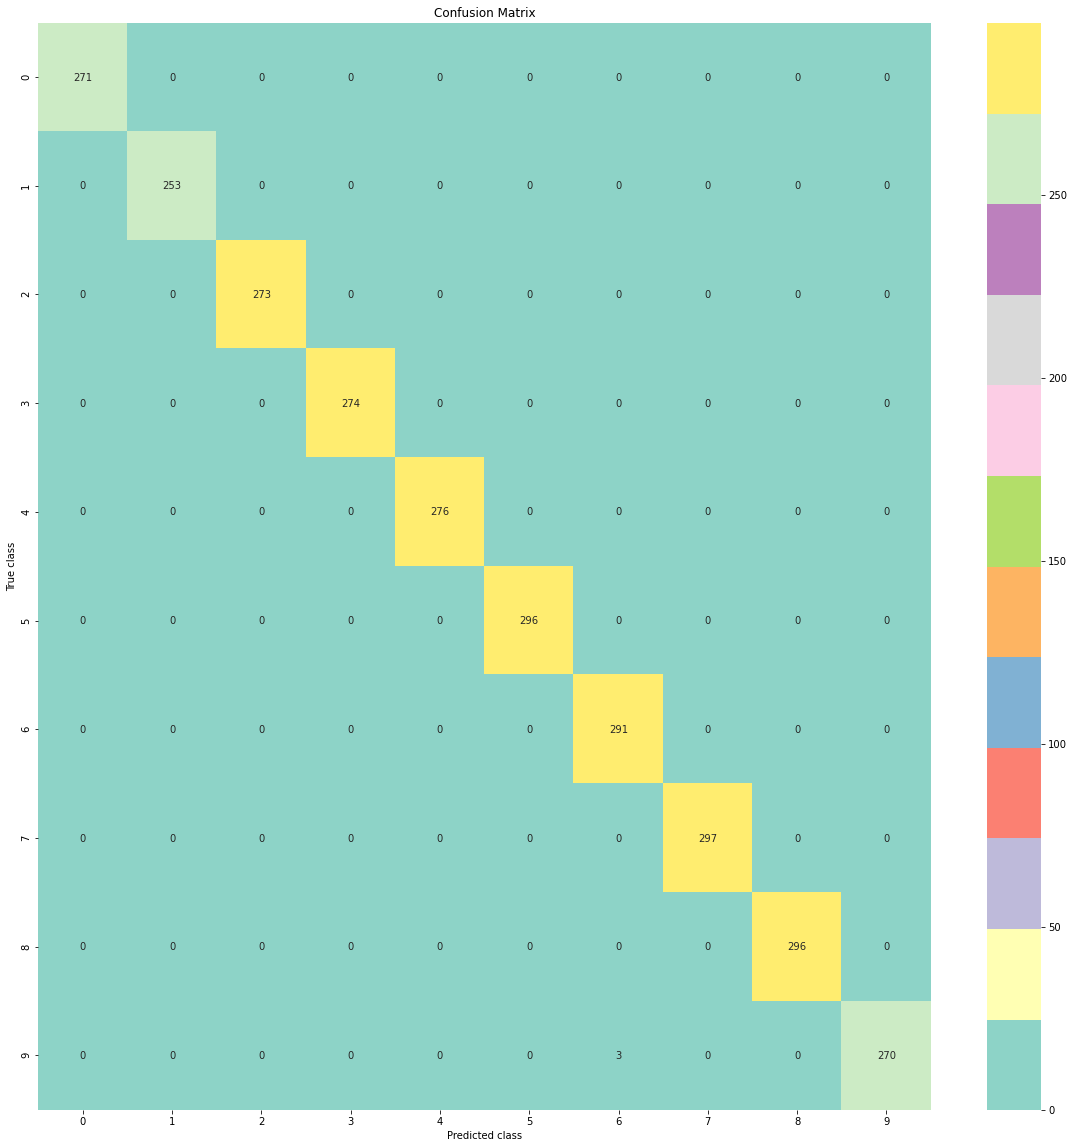

In [66]:
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
cm=confusion_matrix(y_test.argmax(axis=1),round_off.argmax(axis=1))
print("Confusion Matrix")
print(cm)

plt.figure(figsize=(20,20))
sns.heatmap(cm,annot=True,fmt="d",cmap='Set3')
plt.title("Confusion Matrix")
plt.ylabel("True class")
plt.xlabel("Predicted class")
plt.show()

In [72]:
mydict = {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 
        'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}
import librosa
audio_file_path="D:\\shravanne-tasks\\new\\genres_original\\disco\\disco.00009.wav"
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)
mfccs = np.mean(librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40).T,axis=0)
x=[]
x.append(mfccs)
x=np.array(x)
x=np.reshape(x,(x.shape[0],10,4))
y_pre=model.predict(x)
y_pre=np.round_(y_pre)
a,b=np.where(y_pre==1)
for gerne, classs in mydict.items(): 
    if classs == b[0]:
        print(gerne)

1/1 [==============================] - 7s 7s/step
disco


In [71]:
mydict

{'blues': 0,
 'classical': 1,
 'country': 2,
 'disco': 3,
 'hiphop': 4,
 'jazz': 5,
 'metal': 6,
 'pop': 7,
 'reggae': 8,
 'rock': 9}

In [73]:
model.save("lstm.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:

# equivalent to: model.save("model.h5")
#from tensorflow.keras.models import save_model
#save_model(model, "model.h5")

In [ ]:

# load and evaluate a saved model
from numpy import loadtxt
from tensorflow.keras.models import load_model
 
# load model
model = load_model('model.h5')
# summarize model.
model.summary()
# load dataset
dataset = loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# evaluate the model
score = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))